In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Sequential, layers

In [9]:
train_datagen = ImageDataGenerator(
                rescale=1./255, 
                shear_range=0.2,
                zoom_range=0.2, 
                horizontal_flip=True 
            )

val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
                    '../Cat-or-Dog/cat-dog-data/training_set/training_set', 
                    target_size=(224, 224), 
                    batch_size=32, 
                    class_mode='binary'
                )
val_generator = val_datagen.flow_from_directory(
                    '../Cat-or-Dog/cat-dog-data/test_set/test_set', 
                    target_size=(224, 224), 
                    batch_size=32, 
                    class_mode='binary' 
                )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


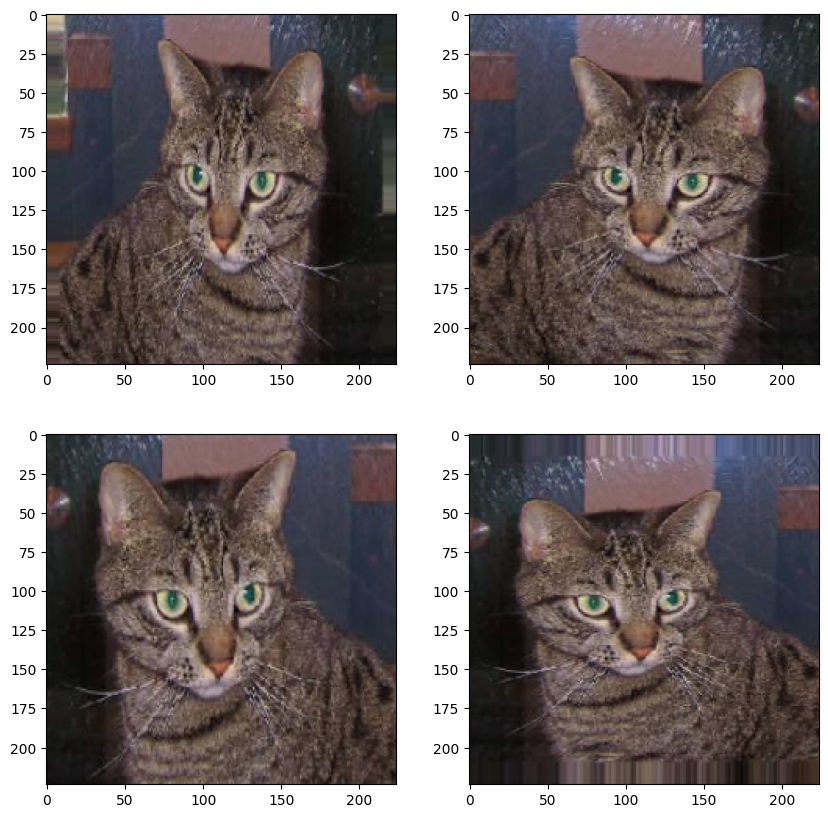

In [11]:
img_path = '../Cat-or-Dog/cat-dog-data/training_set/training_set/cats/cat.100.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for i, batch in enumerate(train_datagen.flow(x, batch_size=1)):
    ax[i].imshow(batch[0])
    if i == 3:
        break
plt.show()

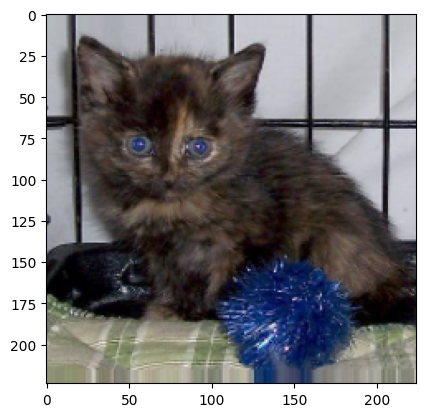

In [12]:
x, y = train_generator.next()
image = x[0]
plt.imshow(image)
plt.show()

In [13]:
model = Sequential(
            [
                layers.Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(64,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(128,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Conv2D(128,(3,3), activation='relu'),
                layers.MaxPool2D((2,2)),
                
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')
             ]
)

2024-01-17 18:21:37.427560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-17 18:21:37.595089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-17 18:21:37.595131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-17 18:21:37.598043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-17 18:21:37.598087: I tensorflow/compile

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [15]:
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,epochs=15, validation_data=val_generator)

Epoch 1/15


2024-01-17 18:21:39.446524: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8904
2024-01-17 18:21:39.637370: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-17 18:21:40.194313: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-17 18:21:40.568171: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f93dc22aaa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-17 18:21:40.568240: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2024-01-17 18:21:40.574523: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-17 18:21:40.625788: I ./tensorflow/compiler/jit/

251/251 [==============================] - 40s 144ms/step - loss: 0.7387 - accuracy: 0.5273 - val_loss: 0.6696 - val_accuracy: 0.6080
Epoch 2/15
251/251 [==============================] - 36s 144ms/step - loss: 0.6585 - accuracy: 0.6010 - val_loss: 0.6133 - val_accuracy: 0.6495
Epoch 3/15
 53/251 [=====>........................] - ETA: 28s - loss: 0.6099 - accuracy: 0.6704

KeyboardInterrupt: 